# **Trending YouTube Video Statistics**

The notebook will walk you through exploratory data analysis, particulary on India's trending youtube videos and focusing on key features like likes, views and comments.

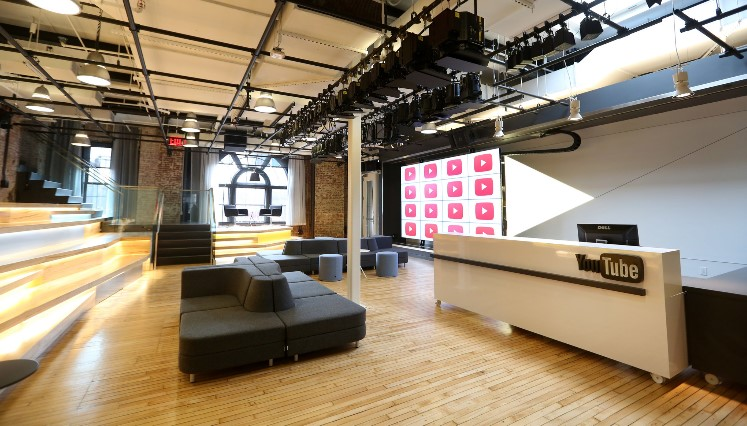

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from subprocess import check_output
import os

**Importing Dataset**

In [2]:
data = pd.read_csv("../input/youtube-new/INvideos.csv", index_col='video_id')
data.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


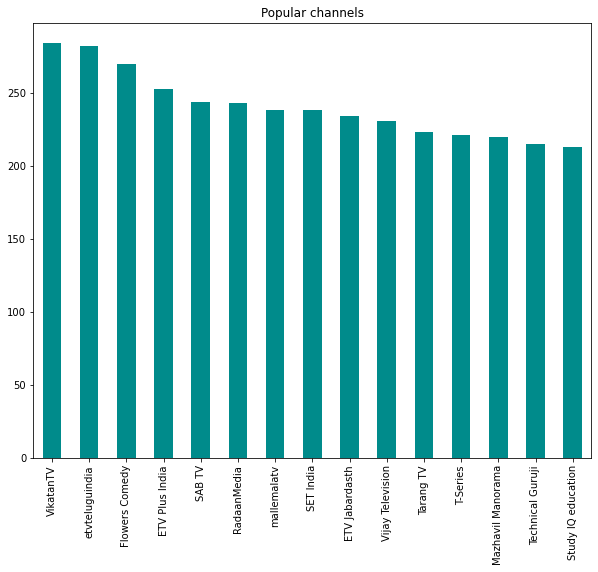

In [3]:
channel_count = data['channel_title'].value_counts()[:15]
channel_count.plot(kind = 'bar', figsize = (10,8), color = 'darkcyan', title = 'Popular channels')

In [4]:
data['trending_date'] = pd.to_datetime(data['trending_date'], format = '%y.%d.%m')
data['trending_date'].head(n = 10)

video_id
kzwfHumJyYc   2017-11-14
zUZ1z7FwLc8   2017-11-14
10L1hZ9qa58   2017-11-14
N1vE8iiEg64   2017-11-14
kJzGH0PVQHQ   2017-11-14
il_pSa5l98w   2017-11-14
7MxiQ4v0EnE   2017-11-14
c64I9HNpiOY   2017-11-14
KObFEYCaRx8   2017-11-14
g8QsfJhFpjY   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [5]:
data['publish_time'] = pd.to_datetime(data['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
data.insert(4, 'publish_date', data['publish_time'].dt.date)
data['publish_time'] = data['publish_time'].dt.time
data[['publish_date', 'publish_time']].head()

,publish_date,publish_time
video_id,,
kzwfHumJyYc,2017-11-12,12:20:39
zUZ1z7FwLc8,2017-11-13,05:43:56
10L1hZ9qa58,2017-11-12,15:48:08
N1vE8iiEg64,2017-11-12,07:08:48
kJzGH0PVQHQ,2017-11-13,01:14:16


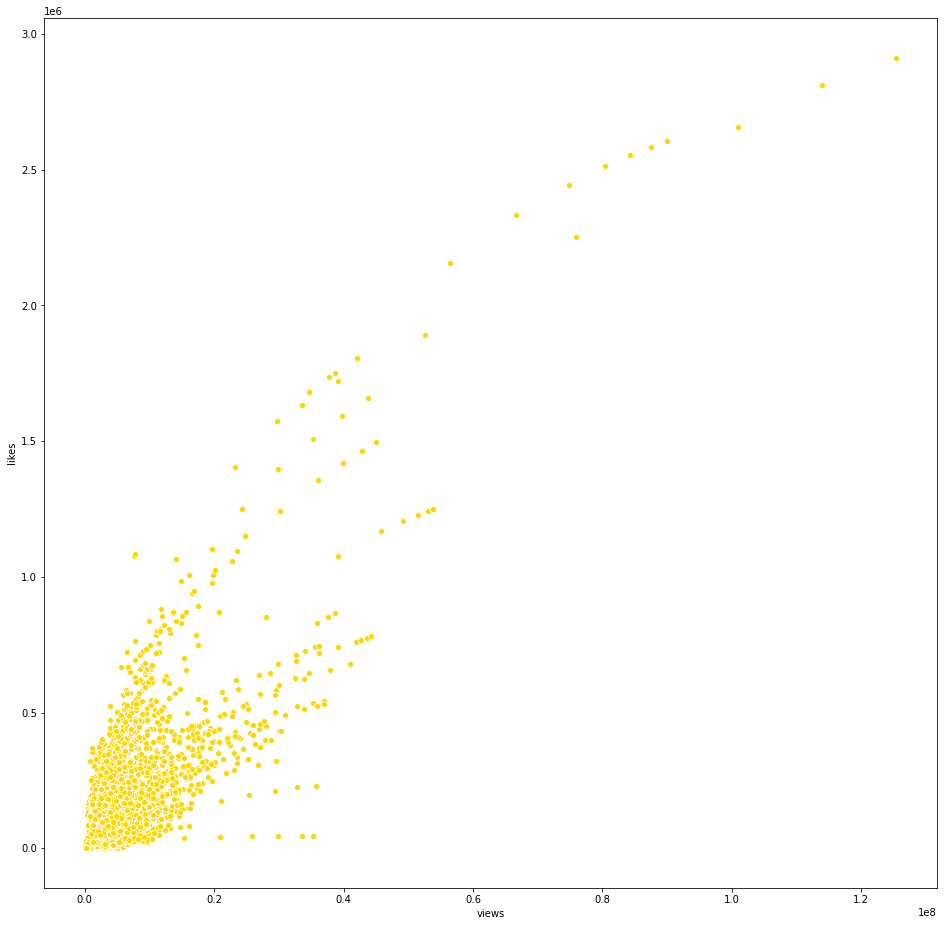

In [6]:
matplotlib.pyplot.figure(figsize=(16, 16))
sns.scatterplot(x = data['views'], y = data['likes'], color = 'gold')